### Generate proper structural connectome data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join as pjoin

In [2]:
# import the sc data
sc_dir = "/Users/yilewang/workspaces/data4project/lateralization/connectome/unzip"

# load caseid
table = pd.read_excel("/Users/yilewang/workspaces/data4project/mega_table.xlsx",sheet_name="tvb_parameters")
# get left and right sc weights
def get_sc_values(sc):
    # keep only the upper triangle
    upper = sc.where(np.triu(np.ones(sc.shape)).astype(bool))
    # turn NaN to 0
    upper = upper.fillna(0)
    
    upper_left = upper.iloc[:,::2]
    upper_right = upper.iloc[:,1::2]

    # only take even rows in upper_left
    upper_left = upper_left.iloc[::2,:]
    # only take odd rows in upper_right
    upper_right = upper_right.iloc[1::2,:]

    # flatten upper_left and get non-zero values from upper_left
    upper_left = upper_left.values.flatten()
    upper_left = upper_left[upper_left != 0]
    # flatten upper_right and get non-zero values from upper_right
    upper_right = upper_right.values.flatten()
    upper_right = upper_right[upper_right != 0]
    return upper_left, upper_right

# create an empty dataframe to store the sc values
sc_values = pd.DataFrame(columns=["group", "caseid"])

for group, caseid in zip(table["group"],table["caseid"]):
    sc = pd.read_csv(pjoin(sc_dir,group,caseid,"weights.txt"),sep="\s+",header=None)
    upper_left, upper_right = get_sc_values(sc)

    sc_values = pd.concat([sc_values, pd.DataFrame({"group":[group],"caseid":[caseid],"upper_left":[np.mean(upper_left)],"upper_right":[np.mean(upper_right)]})])
#     for i,j in zip(range(len(upper_left)), range(len(upper_right))):
#        # append the sc values to the dataframe, with group and caseid as first two columns
#        sc_values = pd.concat([sc_values, pd.DataFrame({"group":[group],"caseid":[caseid],"upper_left":upper_left[i],"upper_right":[upper_right[j]]})])
# print(sc_values)


In [ ]:
regions = ['aCNG-L', 'aCNG-R','mCNG-L','mCNG-R','pCNG-L','pCNG-R', 'HIP-L','HIP-R','PHG-L','PHG-R','AMY-L','AMY-R', 'sTEMp-L','sTEMP-R','mTEMp-L','mTEMp-R']
def get_pCNG(sc):
    # keep only the upper triangle
    upper = sc
    # visualize the SC in a heatmap
    plt.figure(figsize=(15,12))
    # cmap should be blue and red
    sns.heatmap(upper, cmap='bwr')
    # region labels
    plt.xticks(range(len(regions)), regions, rotation=90)
    plt.yticks(range(len(regions)), regions, rotation=0)    
    plt.show()
    
    upper_left = upper.iloc[4,:]
    upper_right = upper.iloc[5,:]

    # flatten upper_left and get non-zero values from upper_left
    upper_left = upper_left.values.flatten()
    # flatten upper_right and get non-zero values from upper_right
    upper_right = upper_right.values.flatten()
    return upper_left, upper_right

sc_pCNG_l = pd.DataFrame(columns=["group", "caseid", 'aCNG-L', 'aCNG-R','mCNG-L','mCNG-R','pCNG-L','pCNG-R', 'HIP-L','HIP-R','PHG-L','PHG-R','AMY-L','AMY-R', 'sTEMp-L','sTEMP-R','mTEMp-L','mTEMp-R'])
sc_pCNG_r = pd.DataFrame(columns=["group", "caseid", 'aCNG-L', 'aCNG-R','mCNG-L','mCNG-R','pCNG-L','pCNG-R', 'HIP-L','HIP-R','PHG-L','PHG-R','AMY-L','AMY-R', 'sTEMp-L','sTEMP-R','mTEMp-L','mTEMp-R'])
for group, caseid in zip(table["group"],table["caseid"]):
    sc = pd.read_csv(pjoin(sc_dir,group,caseid,"weights.txt"),sep="\s+",header=None)
    upper_left, upper_right = get_pCNG(sc)
    sc_pCNG_l = pd.concat([sc_pCNG_l, pd.DataFrame({"group":[group],"caseid":[caseid],"aCNG-L":[upper_left[0]],"aCNG-R":[upper_left[1]],"mCNG-L":[upper_left[2]],"mCNG-R":[upper_left[3]],"pCNG-L":[upper_left[4]],"pCNG-R":[upper_left[5]],"HIP-L":[upper_left[6]],"HIP-R":[upper_left[7]],"PHG-L":[upper_left[8]],"PHG-R":[upper_left[9]],"AMY-L":[upper_left[10]],"AMY-R":[upper_left[11]],"sTEMp-L":[upper_left[12]],"sTEMP-R":[upper_left[13]],"mTEMp-L":[upper_left[14]],"mTEMp-R":[upper_left[15]]})])
    sc_pCNG_r = pd.concat([sc_pCNG_r, pd.DataFrame({"group":[group],"caseid":[caseid],"aCNG-L":[upper_right[0]],"aCNG-R":[upper_right[1]],"mCNG-L":[upper_right[2]],"mCNG-R":[upper_right[3]],"pCNG-L":[upper_right[4]],"pCNG-R":[upper_right[5]],"HIP-L":[upper_right[6]],"HIP-R":[upper_right[7]],"PHG-L":[upper_right[8]],"PHG-R":[upper_right[9]],"AMY-L":[upper_right[10]],"AMY-R":[upper_right[11]],"sTEMp-L":[upper_right[12]],"sTEMP-R":[upper_right[13]],"mTEMp-L":[upper_right[14]],"mTEMp-R":[upper_right[15]]})])
print(sc_pCNG_l)

In [7]:
# import the sc data
sc_dir = "/Users/yilewang/workspaces/data4project/lateralization/connectome/unzip"

# load caseid
table = pd.read_excel("/Users/yilewang/workspaces/data4project/mega_table.xlsx",sheet_name="tvb_parameters")
# get left and right sc weights
def get_sc_values(sc):
    # keep only the upper triangle
    upper = sc.where(np.triu(np.ones(sc.shape)).astype(bool))
    # turn NaN to 0
    upper = upper.fillna(0)
    
    upper_left = upper.iloc[:,::2]
    upper_right = upper.iloc[:,1::2]

    # only take even rows in upper_left
    upper_left = upper_left.iloc[::2,:]
    # only take odd rows in upper_right
    upper_right = upper_right.iloc[1::2,:]

    # flatten upper_left and get non-zero values from upper_left
    upper_left = upper_left.values.flatten()
    upper_left = upper_left[upper_left != 0]
    # flatten upper_right and get non-zero values from upper_right
    upper_right = upper_right.values.flatten()
    upper_right = upper_right[upper_right != 0]
    return upper_left, upper_right

# create an empty dataframe to store the sc values
sc_values = pd.DataFrame(columns=["group", "caseid"])

for group, caseid in zip(table["group"],table["caseid"]):
    sc = pd.read_csv(pjoin(sc_dir,group,caseid,"weights.txt"),sep="\s+",header=None)
    upper_left, upper_right = get_sc_values(sc)

    #sc_values = pd.concat([sc_values, pd.DataFrame({"group":[group],"caseid":[caseid],"upper_left":[np.mean(upper_left)],"upper_right":[np.mean(upper_right)]})])
    for i,j in zip(range(len(upper_left)), range(len(upper_right))):
       # append the sc values to the dataframe, with group and caseid as first two columns
       sc_values = pd.concat([sc_values, pd.DataFrame({"group":[group],"caseid":[caseid],"upper_left":upper_left[i],"upper_right":[upper_right[j]]})])
print(sc_values)


   group caseid  upper_left  upper_right
0    SNC  2820A     18.8000      22.7000
0    SNC  2820A      1.9000       0.5520
0    SNC  2820A      0.3100       0.4310
0    SNC  2820A      0.9730       1.0600
0    SNC  2820A      0.0764       0.0288
..   ...    ...         ...          ...
0     AD  4542A     18.6000      15.3000
0     AD  4542A     15.2000      40.6000
0     AD  4542A     17.1000      10.4000
0     AD  4542A     10.5000      24.8000
0     AD  4542A     94.6000      71.6000

[2121 rows x 4 columns]


<Axes: xlabel='group', ylabel='tracts'>

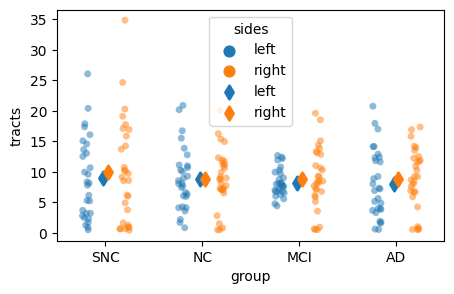

In [16]:
df_avg = pd.read_excel('./sc_values.xlsx',  sheet_name='Sheet3')
plt.figure(figsize=(5, 3))
sns.stripplot(x="group", y="tracts", hue='sides', data=df_avg, dodge=True, alpha=0.5)
sns.pointplot(x="group", y="tracts", hue='sides', data=df_avg, dodge=True, join=False, markers="d", ci=None)